### PEMODELAN DENGAN SVM DAN TF-IDF

In [55]:
import pandas as pd

In [56]:
dataset = pd.read_csv('dataset\dataset-shopee-final.csv')
dataset.head(20)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16756\3926698817.py:1: SyntaxWarning: invalid escape sequence '\d'
  dataset = pd.read_csv('dataset\dataset-shopee-final.csv')


,Date,userName,Rating,Review Text,cleaning,case_folding,normalisasi,tokenize,stopword_removal,stemming,final_text,sentiment
0,2025-06-09 12:20:19,Pengguna Google,5,Jelas dan Terpercaya 💯,Jelas dan Terpercaya,jelas dan terpercaya,jelas dan terpercaya,"['jelas', 'dan', 'terpercaya']",['terpercaya'],['percaya'],percaya,Positif
1,2025-06-16 01:14:54,Pengguna Google,5,"belanja di shopee sangat puas, beda dengan apl...",belanja di shopee sangat puas beda dengan apl...,belanja di shopee sangat puas beda dengan apl...,belanja di shopee sangat puas beda dengan apli...,"['belanja', 'di', 'shopee', 'sangat', 'puas', ...","['belanja', 'shopee', 'puas', 'beda', 'aplikas...","['belanja', 'shopee', 'puas', 'beda', 'aplikas...",belanja shopee puas beda aplikasi belah malal ...,Negatif
2,2025-06-11 19:31:48,Pengguna Google,4,kadang pesanan gak sesuai ekspetasi,kadang pesanan gak sesuai ekspetasi,kadang pesanan gak sesuai ekspetasi,kadang pesanan tidak sesuai ekspetasi,"['kadang', 'pesanan', 'tidak', 'sesuai', 'eksp...","['kadang', 'pesanan', 'sesuai', 'ekspetasi']","['kadang', 'pesan', 'sesuai', 'ekspetasi']",kadang pesan sesuai ekspetasi,Positif
3,2025-06-16 14:19:01,Pengguna Google,2,suka eror,suka eror,suka eror,suka eror,"['suka', 'eror']","['suka', 'eror']","['suka', 'eror']",suka eror,Negatif
4,2025-06-16 17:13:16,Pengguna Google,5,Shopee mantapp selalu memudah kaan kita,Shopee mantapp selalu memudah kaan kita,shopee mantapp selalu memudah kaan kita,shopee mantap selalu memudah kan kita,"['shopee', 'mantap', 'selalu', 'memudah', 'kan...","['shopee', 'mantap', 'memudah']","['shopee', 'mantap', 'mudah']",shopee mantap mudah,Positif
5,2025-06-08 09:26:40,Pengguna Google,5,semoga lancar dan berkah...Aamiin..,semoga lancar dan berkah Aamiin,semoga lancar dan berkah aamiin,semoga lancar dan berkah amin,"['semoga', 'lancar', 'dan', 'berkah', 'amin']","['semoga', 'lancar', 'berkah', 'amin']","['moga', 'lancar', 'berkah', 'amin']",moga lancar berkah amin,Positif
6,2025-06-17 07:17:19,Pengguna Google,3,terbaik,terbaik,terbaik,terbaik,['terbaik'],['terbaik'],['baik'],baik,Netral
7,2025-06-07 19:02:18,Pengguna Google,5,coba dong shoppe pinjam jangka waktu nya di pe...,coba dong shoppe pinjam jangka waktu nya di pe...,coba dong shoppe pinjam jangka waktu nya di pe...,coba dong shoppe pinjam jangka waktu ya di per...,"['coba', 'dong', 'shoppe', 'pinjam', 'jangka',...","['coba', 'shoppe', 'pinjam', 'jangka', 'ya', '...","['coba', 'shoppe', 'pinjam', 'jangka', 'ya', '...",coba shoppe pinjam jangka ya panjang ya cicil ya,Positif
8,2025-06-12 23:28:53,Pengguna Google,5,secara keseluruhan sudah cukup baik dan profes...,secara keseluruhan sudah cukup baik dan profes...,secara keseluruhan sudah cukup baik dan profes...,secara keseluruhan sudah cukup baik dan profes...,"['secara', 'keseluruhan', 'sudah', 'cukup', 'b...","['profesional', 'tingkatkan', 'filter', 'selle...","['profesional', 'tingkat', 'filter', 'seller',...",profesional tingkat filter seller fiktif,Positif
9,2025-06-14 15:16:16,Pengguna Google,4,sayangnya mengambil sendiri,sayangnya mengambil sendiri,sayangnya mengambil sendiri,sayangnya mengambil sendiri,"['sayangnya', 'mengambil', 'sendiri']","['sayangnya', 'mengambil']","['sayang', 'ambil']",sayang ambil,Negatif


In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18747 entries, 0 to 18746
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              18747 non-null  object
 1   userName          18747 non-null  object
 2   Rating            18747 non-null  int64 
 3   Review Text       18747 non-null  object
 4   cleaning          18747 non-null  object
 5   case_folding      18747 non-null  object
 6   normalisasi       18747 non-null  object
 7   tokenize          18747 non-null  object
 8   stopword_removal  18747 non-null  object
 9   stemming          18747 non-null  object
 10  final_text        18747 non-null  object
 11  sentiment         18747 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.7+ MB


In [58]:
dataset.isnull().sum()


Date                0
userName            0
Rating              0
Review Text         0
cleaning            0
case_folding        0
normalisasi         0
tokenize            0
stopword_removal    0
stemming            0
final_text          0
sentiment           0
dtype: int64

In [59]:
dataset.duplicated().sum()

10280

In [60]:
#split dataset menjadi data latih dan data uji (80%:20%)
from sklearn.model_selection import train_test_split
x = dataset['final_text']
y = dataset['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [61]:
#menampilkan informasi data train dan test
print(f'jumlah data train : ', len(x_train))
print(f'jumlah data uji : ' ,len(x_test))

jumlah data train :  14997
jumlah data uji :  3750


In [62]:
#pemodelan
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
#vectorizer
vectorizer = TfidfVectorizer()
x_train_vectorizer = vectorizer.fit_transform(x_train)
x_test_vectorizer = vectorizer.transform(x_test)

In [64]:
# training model svm dengan data yang sudah di-vectorize
svm = SVC(kernel='linear')
svm.fit(x_train_vectorizer, y_train)

SVC(kernel='linear')

In [65]:
# model evaluation
y_pred = svm.predict(x_test_vectorizer)


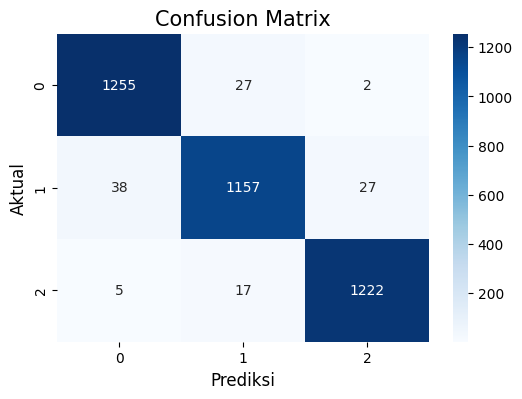

In [66]:
#confussion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi', fontsize=12)
plt.ylabel('Aktual', fontsize=12)
plt.title('Confusion Matrix', fontsize=15)
plt.show()

In [67]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi:' ,accuracy)

#classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

Akurasi: 0.9690666666666666
Classification Report
              precision    recall  f1-score   support

     Negatif       0.97      0.98      0.97      1284
      Netral       0.96      0.95      0.96      1222
     Positif       0.98      0.98      0.98      1244

    accuracy                           0.97      3750
   macro avg       0.97      0.97      0.97      3750
weighted avg       0.97      0.97      0.97      3750



Train Accuracy: 0.9885310395412416


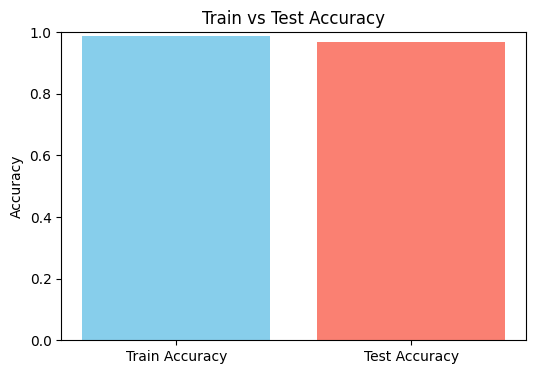

In [ ]:
#chech if model overfitting or not
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, svm.predict(x_train_vectorizer))
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')


In [70]:
#save model
import joblib
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']

In [87]:
def predict_sentiment(text):
    # Vectorize the input text using the fitted vectorizer
    vector = vectorizer.transform([text])
    # Predict using the trained SVM model
    prediction = svm.predict(vector)
    return prediction[0]

text = "aplikasi ini sangat jelek, tidak bisa digunakan"
predicted_sentiment = predict_sentiment(text)
print(f'Teks: "{text}"\nPrediksi Sentimen: {predicted_sentiment}')


Teks: "aplikasi ini sangat jelek, tidak bisa digunakan"
Prediksi Sentimen: Negatif
